# **EXERCÍCIO PROGRAMA 1**

## **Alunos:**  

*   Amanda Cristina Mazer
*   Carlos Alberto Silva de Souza
*   Leonardo Miranda de Brito


Inicialização das bibliotecas

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import random
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Estabelecendo o diretório de trabalho como a pasta contendo os EPs

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/MAC5768 - EPs'
os.chdir(path)
!ls

 aneis		     EP1.ipynb				 MetaDados.gsheet
 canetas	    'EP1 Leonardo.ipynb'		 Monitoria-20-04.ipynb
 chaves		     facas				 pratos
 colher_de_pau	     garfos				 skimage_intro.ipynb
 copos		    'Informações padronizadas EP.gdoc'	 tenis
'EP1 Amanda.ipynb'   livros
'EP1 Carlos.ipynb'   MetaDadosc.xlsx


Leitura dos metadados

In [ ]:
metadados = pd.read_excel('MetaDadosc.xlsx')
metadados

,nome_arq,classe,numero_obj,repeticao,fundo,iluminacao
0,lvr1,6,1,1,1,2
1,lvr2,6,1,2,1,2
2,lvr3,6,1,3,1,2
3,lvr4,6,2,1,1,2
4,lvr5,6,2,2,1,2
...,...,...,...,...,...,...
3271,tns356,4,9,2,3,3
3272,tns357,4,9,3,3,3
3273,tns358,4,10,1,3,3
3274,tns359,4,10,2,3,3


## **Tabela Global Sumária**

Número de classes

In [ ]:
n_classes = len(set(metadados.classe))
print(n_classes)

10


Número de imagens total

In [ ]:
n_imagens = len(set(metadados.nome_arq))
print(n_imagens)

3276


Tamanho da base de dados em bytes

In [ ]:
folders = next(os.walk("."))[1]
database_size = 0
for i in folders:
  for j in os.listdir(i):
    file_path = i + '/' + j
    img_size = os.path.getsize(file_path)
    database_size = database_size + img_size

print(database_size)

6017620129


Resolução das imagens por classe

In [ ]:
classes = []
shape = []
for k in folders:
  file_list = os.listdir(k)
  path_img = k + '/' + file_list[random.randint(0,len(file_list)-1)]
  img = plt.imread(path_img)
  classes.append(k)
  shape.append(img.shape[0:2])

classes = [c.replace('_', ' ') for c in classes]
classes = [c.capitalize() for c in classes]
resolucao = {'Classes': classes, 'Resolução': shape}
resolucao_df = pd.DataFrame(data=resolucao)
resolucao_df

,Classes,Resolução
0,Chaves,"(3264, 1836)"
1,Livros,"(3000, 4000)"
2,Colher de pau,"(3000, 4000)"
3,Canetas,"(3264, 1836)"
4,Aneis,"(3264, 1836)"
5,Copos,"(3000, 4000)"
6,Facas,"(3264, 2448)"
7,Garfos,"(3264, 2448)"
8,Pratos,"(3264, 2448)"
9,Tenis,"(3000, 4000)"


Tabela completa:



In [ ]:
tabela_global = {'Descrição': ['Número de classes','Número de imagens','Tamanho da base (bytes)','Resolução das imagens de ' + classes[0],
                               'Resolução das imagens de ' + classes[1], 'Resolução das imagens de ' + classes[2], 'Resolução das imagens de ' + classes[3],
                               'Resolução das imagens de ' + classes[4], 'Resolução das imagens de ' + classes[5], 'Resolução das imagens de ' + classes[6],
                               'Resolução das imagens de ' + classes[7], 'Resolução das imagens de ' + classes[8], 'Resolução das imagens de ' + classes[9]], 
                 'Valores': [n_classes, n_imagens, database_size, str(shape[0][0])+ ' linhas X ' + str(shape[0][1]) + ' colunas', 
                             str(shape[1][0])+ ' linhas X ' + str(shape[1][1]) + ' colunas', 
                             str(shape[2][0])+ ' linhas X ' + str(shape[2][1]) + ' colunas', 
                             str(shape[3][0])+ ' linhas X ' + str(shape[3][1]) + ' colunas', 
                             str(shape[4][0])+ ' linhas X ' + str(shape[4][1]) + ' colunas', 
                             str(shape[5][0])+ ' linhas X ' + str(shape[5][1]) + ' colunas', 
                             str(shape[6][0])+ ' linhas X ' + str(shape[6][1]) + ' colunas', 
                             str(shape[7][0])+ ' linhas X ' + str(shape[7][1]) + ' colunas', 
                             str(shape[8][0])+ ' linhas X ' + str(shape[8][1]) + ' colunas', 
                             str(shape[9][0])+ ' linhas X ' + str(shape[9][1]) + ' colunas']}
tabela_global_df = pd.DataFrame(data=tabela_global)
tabela_global_df

,Descrição,Valores
0,Número de classes,10
1,Número de imagens,3276
2,Tamanho da base (bytes),6017620129
3,Resolução das imagens de Chaves,3264 linhas X 1836 colunas
4,Resolução das imagens de Livros,3000 linhas X 4000 colunas
5,Resolução das imagens de Colher de pau,3000 linhas X 4000 colunas
6,Resolução das imagens de Canetas,3264 linhas X 1836 colunas
7,Resolução das imagens de Aneis,3264 linhas X 1836 colunas
8,Resolução das imagens de Copos,3000 linhas X 4000 colunas
9,Resolução das imagens de Facas,3264 linhas X 2448 colunas


## **Tabela Detalhada por Classe**

In [ ]:
tab_detalhe_class = pd.DataFrame(columns = ['Objeto','Nº de objetos','Fundo','Iluminação','Nº de repetições', 'Nº de amostras'])
for o in range(1,len(set(metadados.classe))+1):
  item = metadados[metadados.classe == o]
  n_objetos = len(set(item.numero_obj))
  fundo = zip(set(item.fundo),['Liso amarelo claro', 'Liso Rosa', 'Liso Vermelho'])
  iluminacao = zip(set(item.iluminacao),['Indoor/dia', 'Indoor/noite', 'Outdoor/dia', 'Outdoor/noite'])
  repeticoes = len(set(item.repeticao))
  total_amostras = len(item.nome_arq)
  tab_detalhe_class = tab_detalhe_class.append({'Objeto':o, 'Nº de objetos':n_objetos, 'Fundo':tuple(fundo), 'Iluminação':tuple(iluminacao),
                                                'Nº de repetições':repeticoes, 'Nº de amostras':total_amostras},ignore_index=True,)

In [ ]:
tab_detalhe_class.Objeto = ['Facas','Copo de vidro','Garfo','Tênis','Caneta','Livro','Colher de pau','Prato','Chaves','Anéis']
tab_detalhe_class

,Objeto,Nº de objetos,Fundo,Iluminação,Nº de repetições,Nº de amostras
0,Facas,7,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,252
1,Copo de vidro,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
2,Garfo,6,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,216
3,Tênis,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
4,Caneta,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
5,Livro,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
6,Colher de pau,8,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,288
7,Prato,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
8,Chaves,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360
9,Anéis,10,"((1, Liso amarelo claro), (2, Liso Rosa), (3, ...","((1, Indoor/dia), (2, Indoor/noite), (3, Outdo...",3,360


## **Visualização MNIST**

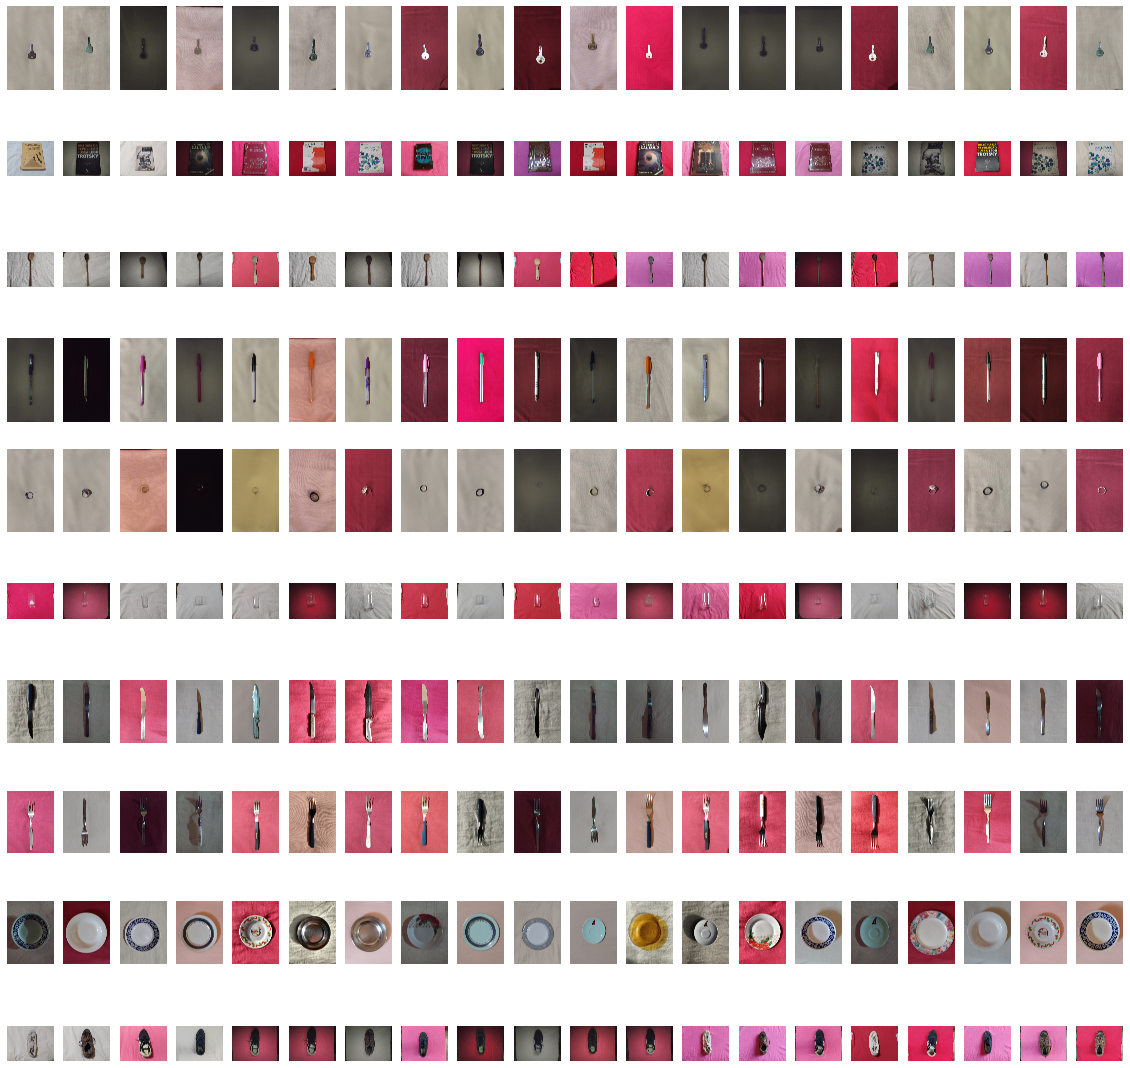

In [ ]:
n_colunas, n_linhas = 20, 10

fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))
num_fotos = n_colunas * n_linhas

sample_imgs = []
for obj in folders:
  file_list = os.listdir(obj)
  sample_index = random.sample(range(0,len(file_list)-1), n_colunas)
  samples = [file_list[i] for i in sample_index]
  samples = [obj + '/' + file_list[i] for i in sample_index]
  sample_imgs.append(samples)

flat_list = [item for sublist in sample_imgs for item in sublist]

for e, imagem in enumerate(flat_list[:num_fotos]):
    l, c = (e // n_colunas, e % n_colunas)
    matriz = plt.imread(imagem)
    axs[l, c].imshow(matriz)
    axs[l, c].axis('off')
plt.show()